In [1]:
#python install package to install seaborn
import matplotlib.pyplot as plt  # used for plotting
import seaborn as sns  # heatmap
import pandas as pd

In [2]:
!unzip "analysing customer spending habits.zip"
!unzip "fashion retail sales.zip"
!unzip "customer data.zip"

Archive:  analysing customer spending habits.zip
  inflating: SalesForCourse_quizz_table.csv  
Archive:  fashion retail sales.zip
  inflating: Fashion_Retail_Sales.csv  
Archive:  customer data.zip
  inflating: Customers.csv           


   Customer Reference ID Item Purchased  Purchase Amount (USD) Date Purchase  \
0                   4018        Handbag                 4619.0    2023-02-05   
1                   4115          Tunic                 2456.0    2023-07-11   
2                   4019       Tank Top                 2102.0    2023-03-23   
3                   4097       Leggings                 3126.0    2023-03-15   
4                   3997         Wallet                 3003.0    2022-11-27   

   Review Rating Payment Method  
0            NaN    Credit Card  
1            2.0    Credit Card  
2            4.1           Cash  
3            3.2           Cash  
4            4.7           Cash  
3400
Index(['Customer Reference ID', 'Item Purchased', 'Purchase Amount (USD)',
       'Date Purchase', 'Review Rating', 'Payment Method'],
      dtype='object')
Customer Reference ID      int64
Item Purchased            object
Purchase Amount (USD)    float64
Date Purchase             object
Review Rating        

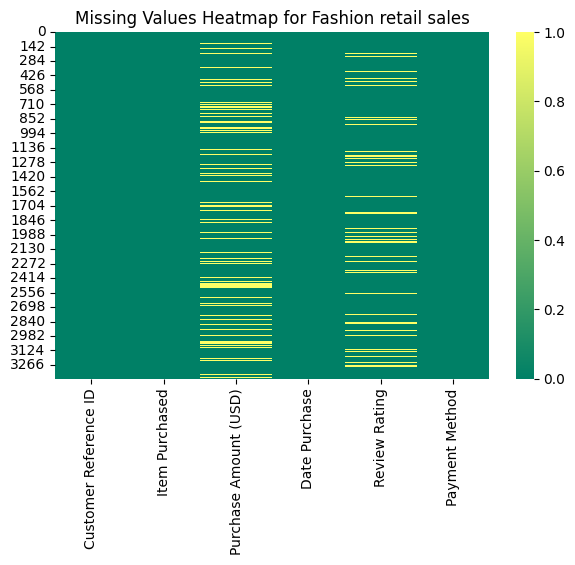

In [3]:
import pandas as pd
#loading the csv file
data1 = pd.read_csv('fashion retail sales.zip')

# checking the first 5 rows of my file to confirm its content
print(data1.head())

# print the number of rows(data points)
print(len(data1))

#print the names of the attributes(columns)
print(data1.columns)

#print the data type the attributes hold
print(data1.dtypes)

#identify the amount of null values for each attribute using the isnull function
print(data1.isnull().sum())

#find entry errors for each attribute such as inconsistenies. i am finding rows where the customer reference ID value is either less than 3957 or greater than 4122
print(data1[(data1['Customer Reference ID'] < 3957) | (data1['Customer Reference ID'] > 4122)])
print(data1[(data1['Purchase Amount (USD)'] < 0) | (data1['Purchase Amount (USD)'] > 4932.0)])

plt.figure(figsize=(7, 4.5)) #set the size of the plot
sns.heatmap(data1.isnull(), cmap='summer') #find the missing values and gives the heatmap a colour
plt.title('Missing Values Heatmap for Fashion retail sales') #title of heatmap
plt.show() #this displays the heatmap


In [4]:
data2 = pd.read_csv('analysing customer spending habits.zip')
data2 = data2.drop(columns=['Column1']) #there is a empty and incorrect column in the database so im using the drop function to remove it

print(len(data2))
print(data2.columns)
print(data2.dtypes)
print(data2.isnull().sum())
print(data2[(data2['Date'] >= ('2015-01-01')) & (data2['Date'] <= ('2016-07-31'))]) #checking for entry errors by checking the attribute 'date' values were inbetween certain dates

34867
Index(['index', 'Date', 'Year', 'Month', 'Customer Age', 'Customer Gender',
       'Country', 'State', 'Product Category', 'Sub Category', 'Quantity',
       'Unit Cost', 'Unit Price', 'Cost', 'Revenue'],
      dtype='object')
index                 int64
Date                 object
Year                float64
Month                object
Customer Age        float64
Customer Gender      object
Country              object
State                object
Product Category     object
Sub Category         object
Quantity            float64
Unit Cost           float64
Unit Price          float64
Cost                float64
Revenue             float64
dtype: object
index               0
Date                1
Year                1
Month               1
Customer Age        1
Customer Gender     1
Country             1
State               1
Product Category    1
Sub Category        1
Quantity            1
Unit Cost           1
Unit Price          1
Cost                1
Revenue             0
dty

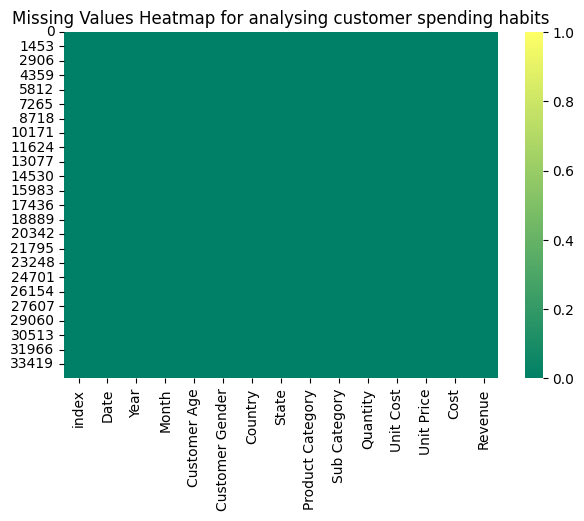

In [5]:
plt.figure(figsize=(7, 4.5))
sns.heatmap(data2.isnull(), cmap='summer')
plt.title('Missing Values Heatmap for analysing customer spending habits')
plt.show()

2000
Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income ($)          int64
Spending Score (1-100)     int64
Profession                object
Work Experience            int64
Family Size                int64
dtype: object
CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64


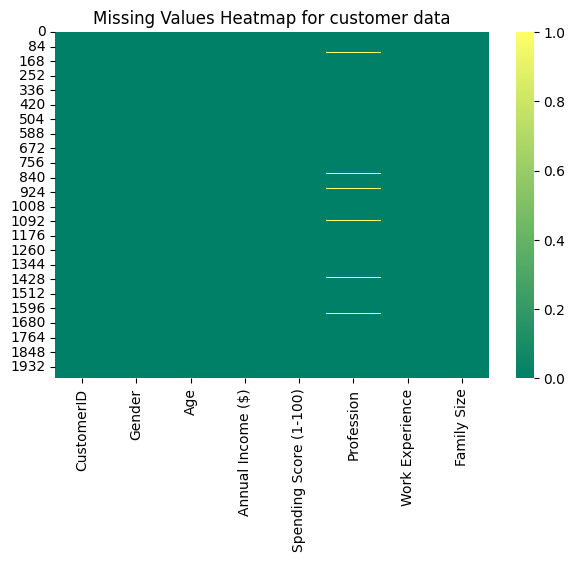

In [6]:
import pandas as pd
data3 = pd.read_csv('customer data.zip')
print(len(data3))
print(data3.columns)
print(data3.dtypes)
print(data3.isnull().sum())

plt.figure(figsize=(7, 4.5))
sns.heatmap(data3.isnull(), cmap='summer')
plt.title('Missing Values Heatmap for customer data')
plt.show()

In [7]:
import pandas as pd
data1=pd.read_csv('fashion retail sales.zip') #loading the file into a dataframe
data1 =pd.DataFrame(data1)
data2=pd.read_csv('analysing customer spending habits.zip')
data2 =pd.DataFrame(data2)
data3=pd.read_csv('customer data.zip')
data3 =pd.DataFrame(data3)

#renaming the id keys from the different data sets that are unique identifiers but common all 3 files
data1 = pd.read_csv('fashion retail sales.zip').rename(columns={'Customer Reference ID': 'unique_key'})
data2 = pd.read_csv('analysing customer spending habits.zip').rename(columns={'index': 'unique_key'})
data3 = pd.read_csv('customer data.zip').rename(columns={'CustomerID': 'unique_key'})


In [8]:
merged_data= pd.merge(data1,data3, on='unique_key', how='outer') #i used the merge function to combine the two data sets with the unique key shared across the two datasets
merged_data = pd.merge(merged_data, data2, on='unique_key', how='outer') #outer join merger so all the rows and columns from the data sets will be included in the merged data set
merged_data.to_csv('merged_data.csv') #saves the merged data file as a csv file

In [9]:
print(merged_data.head())

   unique_key Item Purchased  Purchase Amount (USD) Date Purchase  \
0           0            NaN                    NaN           NaN   
1           1            NaN                    NaN           NaN   
2           2            NaN                    NaN           NaN   
3           3            NaN                    NaN           NaN   
4           4            NaN                    NaN           NaN   

   Review Rating Payment Method  Gender   Age  Annual Income ($)  \
0            NaN            NaN     NaN   NaN                NaN   
1            NaN            NaN    Male  19.0            15000.0   
2            NaN            NaN    Male  21.0            35000.0   
3            NaN            NaN  Female  20.0            86000.0   
4            NaN            NaN  Female  23.0            59000.0   

   Spending Score (1-100)  ...        Country       State  Product Category  \
0                     NaN  ...  United States  Washington       Accessories   
1                 

In [74]:
print(merged_data.columns)

Index(['unique_key', 'Item Purchased', 'Purchase Amount (USD)',
       'Date Purchase', 'Review Rating', 'Payment Method', 'Gender', 'Age',
       'Annual Income ($)', 'Spending Score (1-100)', 'Profession',
       'Work Experience', 'Family Size', 'Date', 'Year', 'Month',
       'Customer Age', 'Customer Gender', 'Country', 'State',
       'Product Category', 'Sub Category', 'Quantity', 'Unit Cost',
       'Unit Price', 'Cost', 'Revenue', 'Column1'],
      dtype='object')


In [10]:
print("row count after merging:", len(merged_data))

row count after merging: 38101


In [11]:
#DATA CLEANING
data2 = data2.drop(columns=['Year'])
print(data2.head)

<bound method NDFrame.head of        unique_key      Date     Month  Customer Age Customer Gender  \
0               0  02/19/16  February          29.0               F   
1               1  02/20/16  February          29.0               F   
2               2  02/27/16  February          29.0               F   
3               3  03/12/16     March          29.0               F   
4               4  03/12/16     March          29.0               F   
...           ...       ...       ...           ...             ...   
34862       34862  02/07/16  February          38.0               M   
34863       34863  03/13/15     March          38.0               M   
34864       34864  04/05/15     April          38.0               M   
34865       34865  08/30/15    August          38.0               M   
34866       34866       NaN       NaN           NaN             NaN   

             Country           State Product Category     Sub Category  \
0      United States      Washington      A

In [12]:
# using interquartile range, lower and upper bound to remove outliers
lower_bound = data3['Annual Income ($)'].quantile(0.25)
upper_bound = data3['Annual Income ($)'].quantile(0.75)

# remove the outliers
clean_data3 = data3[(data3['Annual Income ($)'] >= lower_bound) & (data3['Annual Income ($)'] <= upper_bound)]

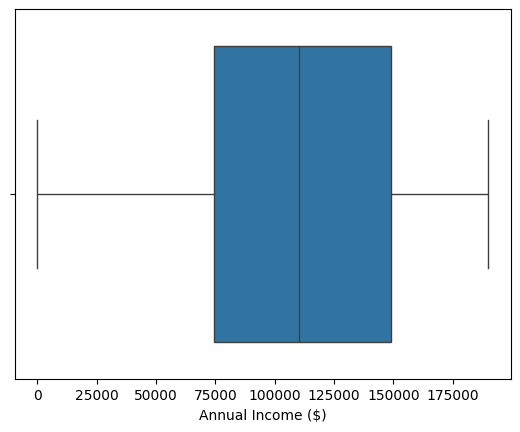

In [13]:
sns.boxplot(x=data3['Annual Income ($)'])
plt.show()

In [14]:
print(data3.describe())

        unique_key          Age  Annual Income ($)  Spending Score (1-100)  \
count  2000.000000  2000.000000        2000.000000             2000.000000   
mean   1000.500000    48.960000      110731.821500               50.962500   
std     577.494589    28.429747       45739.536688               27.934661   
min       1.000000     0.000000           0.000000                0.000000   
25%     500.750000    25.000000       74572.000000               28.000000   
50%    1000.500000    48.000000      110045.000000               50.000000   
75%    1500.250000    73.000000      149092.750000               75.000000   
max    2000.000000    99.000000      189974.000000              100.000000   

       Work Experience  Family Size  
count      2000.000000  2000.000000  
mean          4.102500     3.768500  
std           3.922204     1.970749  
min           0.000000     1.000000  
25%           1.000000     2.000000  
50%           3.000000     4.000000  
75%           7.000000     5.00

In [15]:
#FEATURE ENGINEERING

In [16]:

mean_purchase_amount = data1['Purchase Amount (USD)'].mean()  # i calculated the mean of the 'Purchase Amount (USD)' column
print(mean_purchase_amount)
data1['Purchase Amount (USD)'] = data1['Purchase Amount (USD)'].fillna(mean_purchase_amount) #this code replaces the missing values with the mean purchase amount
print(data1['Purchase Amount (USD)'].isna().sum())  # checking to see if there are any missing values left and that the code has worked


156.70981818181818
0


In [17]:
data1 = pd.read_csv('fashion retail sales.zip')

# groupby function to group Customer Reference ID and the sum the Purchase Amount (USD) per customer (with their own reference id)
total_sales = data1.groupby('Customer Reference ID')['Purchase Amount (USD)'].sum()

# prints the first 5 rows of customer id and the overall sum of their puchase amount
print(total_sales.head())

Customer Reference ID
3957    1150.0
3958    1334.0
3959    2047.0
3960    1434.0
3961    1811.0
Name: Purchase Amount (USD), dtype: float64


In [18]:
df_cleaned_data1 = data1
df_cleaned_data3 = data3
df_cleaned_data2 = data2

df_cleaned_data1.to_csv("cleaned_fashion_retail_sales.csv", index=False)
df_cleaned_data2.to_csv("cleaned_customer_spending.csv", index=False)
df_cleaned_data3.to_csv("cleaned_customer_data.csv", index=False)

final_data1 = pd.read_csv("cleaned_fashion_retail_sales.csv")
final_data2 = pd.read_csv("cleaned_customer_spending.csv")
final_data3 = pd.read_csv("cleaned_customer_data.csv")


In [19]:
#METADATA

In [20]:
metadata = {
    'data1': { # adding the basic properties
        'number of Rows': len(data1),
        'number of Columns': len(data1.columns),
        'Column names': list(data1.columns),
        'Data types': data1.dtypes
    },
    'data2': {
        'number of Rows': len(data2),
        'number of Columns': len(data2.columns),
        'Column names': list(data2.columns),
        'Data types': data2.dtypes
    },
    'data3': {
        'number of Rows': len(data3),
        'number of Columns': len(data3.columns),
        'Column names': list(data3.columns),
        'Data types': data3.dtypes
    }
}

print(metadata)
#printing basic stats
print(final_data1.describe(include='all'))  #without include all it was only printing 3 columns, so this code includes all columns
print(final_data2.describe(include='all'))
print(final_data3.describe(include='all'))

{'data1': {'number of Rows': 3400, 'number of Columns': 6, 'Column names': ['Customer Reference ID', 'Item Purchased', 'Purchase Amount (USD)', 'Date Purchase', 'Review Rating', 'Payment Method'], 'Data types': Customer Reference ID      int64
Item Purchased            object
Purchase Amount (USD)    float64
Date Purchase             object
Review Rating            float64
Payment Method            object
dtype: object}, 'data2': {'number of Rows': 34867, 'number of Columns': 15, 'Column names': ['unique_key', 'Date', 'Month', 'Customer Age', 'Customer Gender', 'Country', 'State', 'Product Category', 'Sub Category', 'Quantity', 'Unit Cost', 'Unit Price', 'Cost', 'Revenue', 'Column1'], 'Data types': unique_key            int64
Date                 object
Month                object
Customer Age        float64
Customer Gender      object
Country              object
State                object
Product Category     object
Sub Category         object
Quantity            float64
Unit Cost   

In [29]:
import sqlite3
# connecting to the SQLite database
conn = sqlite3.connect("DEdb")
cur = conn.cursor()

# loading the csv files into data frames
df_fashion_retail_sales = pd.read_csv('/content/cleaned_fashion_retail_sales.csv')
df_customer_spending = pd.read_csv('/content/cleaned_customer_spending.csv')
df_customer_info = pd.read_csv('/content/cleaned_customer_data.csv')

# loading the data frames into sql tables
df_cleaned_data1.to_sql("fashion_retail_sales", conn,if_exists='replace')
df_cleaned_data2.to_sql("customer_spending", conn, if_exists='replace')
df_cleaned_data3.to_sql("Customer_Info", conn,if_exists='replace')

#writing my sql queries to load the data from fashion retail sales table
fashion_sales_data = pd.read_sql('SELECT * FROM Fashion_retail_Sales', conn)
print("Fashion Sales Data:\n", fashion_sales_data)

customer_spending_data = pd.read_sql('SELECT * FROM Customer_Spending', conn)
print("\nCustomer Spending Data:\n", customer_spending_data)

customer_info_data = pd.read_sql('SELECT * FROM Customer_Info', conn)
print("\nCustomer Info Data:\n", customer_info_data)

Fashion Sales Data:
       index  Customer Reference ID Item Purchased  Purchase Amount (USD)  \
0         0                   4018        Handbag                 4619.0   
1         1                   4115          Tunic                 2456.0   
2         2                   4019       Tank Top                 2102.0   
3         3                   4097       Leggings                 3126.0   
4         4                   3997         Wallet                 3003.0   
...     ...                    ...            ...                    ...   
3395   3395                   4118         Shorts                   37.0   
3396   3396                   4056       Slippers                  176.0   
3397   3397                   3991         Onesie                    NaN   
3398   3398                   4042        Sandals                  128.0   
3399   3399                   4001       Backpack                  115.0   

     Date Purchase  Review Rating Payment Method  
0       2023-02